<a href="https://colab.research.google.com/github/Metodoscomputacionales1/Metodos1_PedroAngarita_SimonUribe/blob/main/Tarea6/Ejercicio_hidden_markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T=np.array([[0.8,0.2],\
            [0.2,0.8]])

In [3]:
E=np.array([[0.5,0.9],\
            [0.5,0.1]])

In [4]:
inicial=np.array([0.2,0.8])

In [5]:
Dict={0:"J", 1:"B"}

In [6]:
secuencia=np.array(["S","C","C","C","S","C","S","C"])

In [7]:
posicion=[]
for i in range(len(secuencia)):
  if secuencia[i]=="S":
    posicion.append(1)
  else:
    posicion.append(0)
posicion

[1, 0, 0, 0, 1, 0, 1, 0]

In [8]:
def hiden_states( H, O, T, E, I):
  P = 1.
  for i in range(len(H)):
    P*=E[O[i], H[i]]
    if i:
      P*=T[H[i], H[i-1]]
  #for j in range(1,len(H)):
  #  P*=T[O[j], O[j-1]]
  Tot=P*I[H[0]]
  return Tot


In [9]:
import itertools

H=O=list(itertools.product([0,1],[0,1],[0,1],[0,1],[0,1], [0,1], [0,1], [0,1]))


In [22]:
probH=[]
for i in range(len(H)):
  probH.append(hiden_states(H[i], posicion, T, E, inicial))

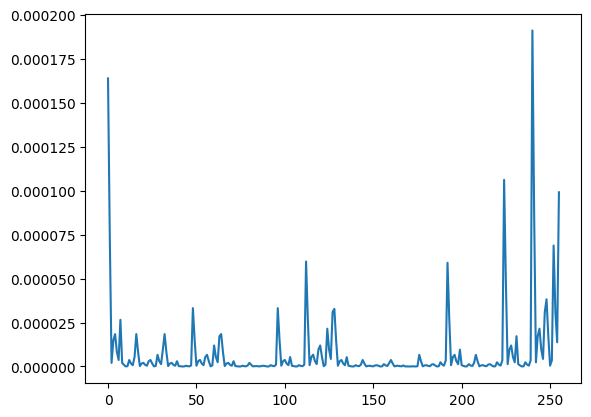

In [11]:
plt.plot(probH)

In [12]:
hiden_states([1,1,1,1,0,0,0,0],posicion,T,E,inicial) # Probabilidad de mejor secuencia

0.00019110297600000013

In [19]:
s=H[np.argmax(probH)]

In [20]:
for i in range(len(s)):
  if s[i]==1:
    print("Moneda: ",Dict[1])
  else:
    print("Moneda: ",Dict[0])

Moneda:  B
Moneda:  B
Moneda:  B
Moneda:  B
Moneda:  J
Moneda:  J
Moneda:  J
Moneda:  J


In [21]:
np.sum(probH)

0.001934438151398401

In [23]:
from tqdm.notebook import tqdm

In [24]:
probO=[]
for j in tqdm(range(len(O))):
  probH=[]
  for i in range(len(H)):
    probH.append(hiden_states(H[i], O[j], T, E, inicial))
  probO.append(np.sum(probH))

  0%|          | 0/256 [00:00<?, ?it/s]

In [27]:
np.sum(probO)

1.0000000000000013

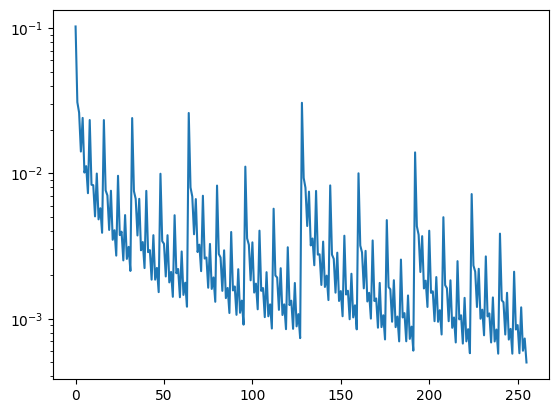

In [29]:
plt.plot(probO)
plt.yscale("log")

In [34]:
probS=[]
for j in tqdm(range(len(O))):
  probH=[]
  for i in range(len(H)):
    probH.append(hiden_states(H[i], O[j], T, E, [0.01,0.99]))
  probS.append(np.sum(probH))

  0%|          | 0/256 [00:00<?, ?it/s]

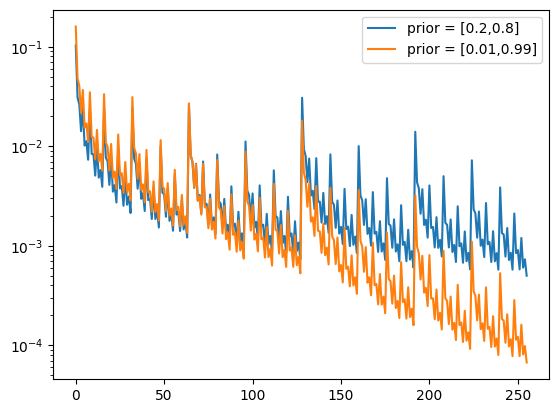

In [37]:
plt.plot(probO,label="prior = [0.2,0.8]")
plt.plot(probS,label="prior = [0.01,0.99]")
plt.yscale("log")
plt.legend()

In [ ]:
#Si depende del prior